In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('C:\\Users\\raksh\\Desktop\\dlithe-project\\indian_liver_patient.csv')

In [3]:
df


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
#Data Cleaning
#Check for number of missing Values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
#Display the rows having missing values
print(df[df.Albumin_and_Globulin_Ratio.isnull()])



     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        2  
312      4.8        

In [6]:
#REMOVE THE ROWS HAVING MISSING VALUES
print(df.dropna(how='any', inplace=True))

None


In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


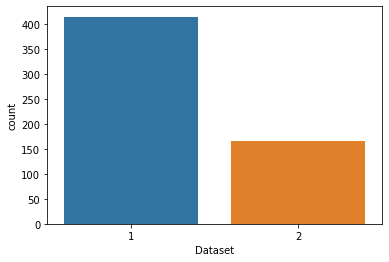

In [8]:
#DATA VISUALIZATION
import seaborn as sns
sns.countplot(data=df, x = 'Dataset', label='Count')
LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  439
Number of patients that are female:  140


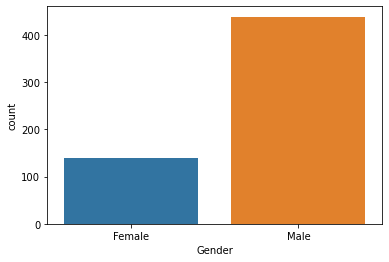

In [9]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


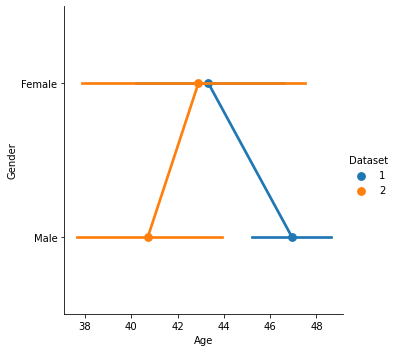

In [10]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df);

In [11]:
#Above implies that AGE is an important factor


In [12]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,49
3,2,Male,116
0,1,Female,91
1,1,Male,323


In [13]:
df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.897959
3,2,Male,40.715517
0,1,Female,43.329670
1,1,Male,46.938080


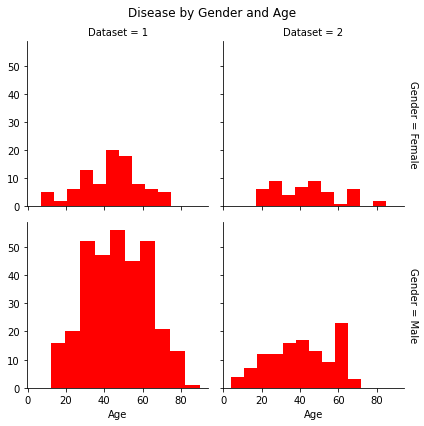

In [14]:
g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

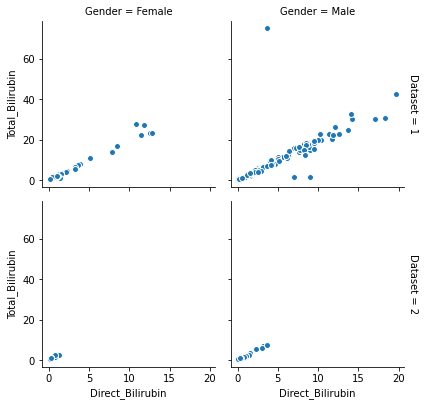

In [15]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

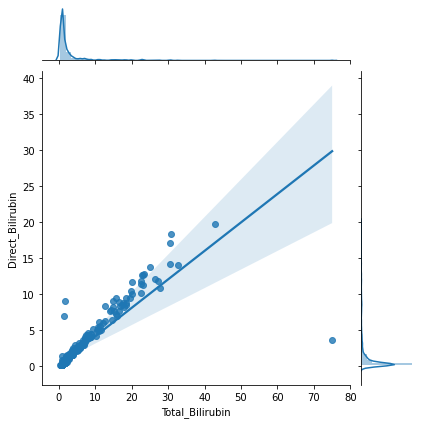

In [16]:
#There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of 
#removing one of this feature.


sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

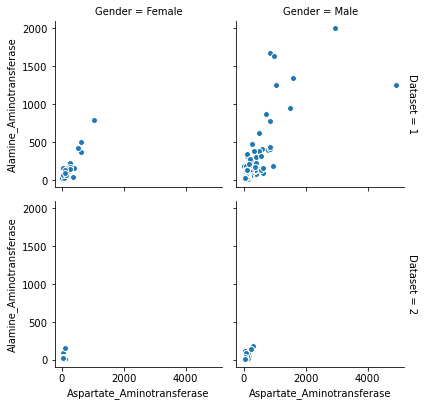

In [17]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

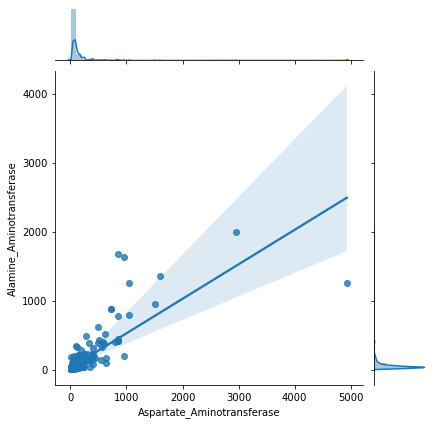

In [18]:
#There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. 
#We have the possibility of removing one of this feature.

sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")



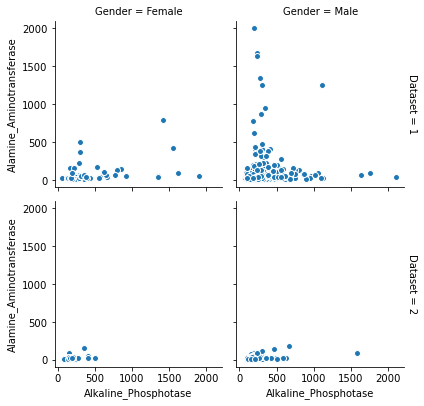

In [19]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

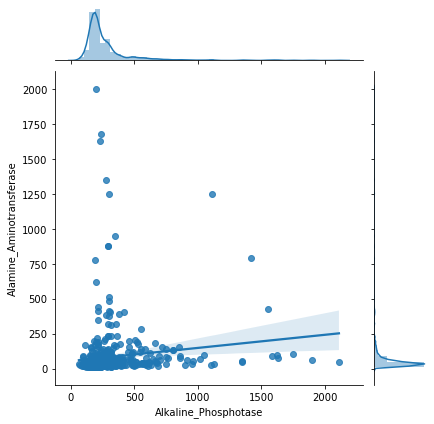

In [20]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=df, kind="reg")

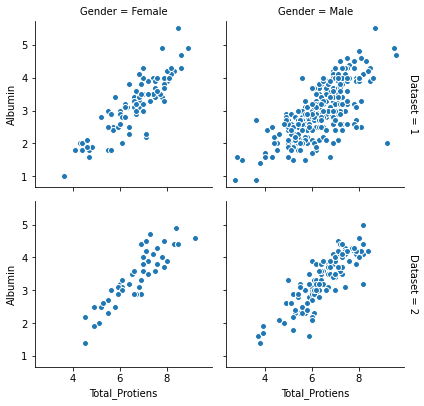

In [21]:
#No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

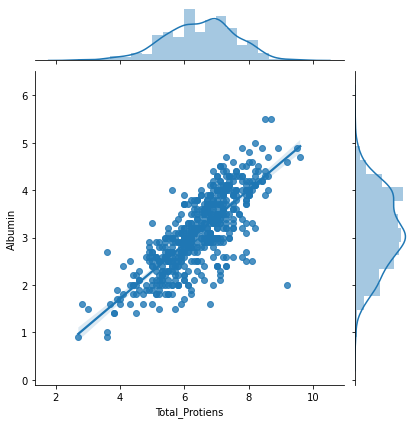

In [22]:
#There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing 
#one of this feature.

sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

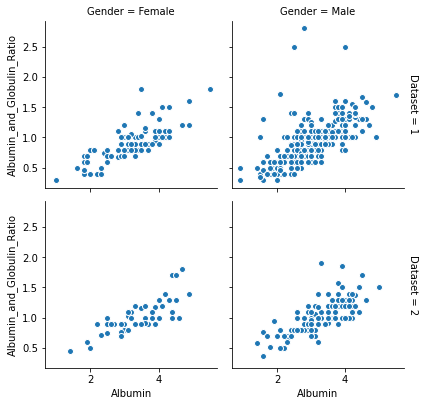

In [23]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [ ]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=df, kind="reg")

In [ ]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [ ]:
#Convert the categorical values of gender
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)

In [ ]:

df.head()

In [ ]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' 
#that determines whether the patient has liver disease or not. 
X = df.drop(['Gender','Dataset'], axis=1)
X.head(3)


In [ ]:
 Y= df['Dataset'] # 1 for liver disease; 2 for no liver disease


In [ ]:
# Correlation
corr = X.corr()

In [ ]:
corr

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');


In [421]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [523]:
#MACHINE LEARNING\
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.17, random_state=299)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)


(480, 11)
(480,)
(99, 11)
(99,)


Logistic Regression Training Score: 
 70.0
Logistic Regression Test Score: 
 81.81818181818183
Coefficient: 
 [[-0.01112551 -0.05348263 -0.41995266 -0.00064794 -0.00956595 -0.00199349
  -0.17603323  0.33754815  0.33522491  0.22843094  0.13535704]]
Intercept: 
 [0.38090827]
Accuracy: 
 0.8181818181818182
Confusion Matrix: 
 [[75  7]
 [11  6]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.87      0.91      0.89        82
           2       0.46      0.35      0.40        17

    accuracy                           0.82        99
   macro avg       0.67      0.63      0.65        99
weighted avg       0.80      0.82      0.81        99



C:\Users\raksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


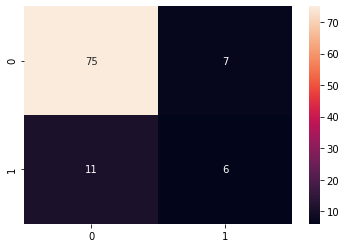

In [524]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
#Logistic Regression
#Create an object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = logreg.score(X_train, Y_train)*100
logreg_score_test = logreg.score(X_test, Y_test)*100
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

sns.heatmap(confusion_matrix(Y_test,log_predicted),annot=True,fmt="d")

In [525]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Albumin,0.337548
8,Albumin_and_Globulin_Ratio,0.335225
9,Gender_Female,0.228431
10,Gender_Male,0.135357
3,Alkaline_Phosphotase,-0.000648
5,Aspartate_Aminotransferase,-0.001993
4,Alamine_Aminotransferase,-0.009566
0,Age,-0.011126
1,Total_Bilirubin,-0.053483
6,Total_Protiens,-0.176033


In [526]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, Y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

In [527]:
lin_predicted

array([1.43287926, 1.35933565, 1.09753004, 1.26826597, 1.4203249 ,
       1.26308976, 1.4866046 , 1.42342808, 1.29029626, 1.36130897,
       1.33498099, 1.41429654, 1.4669279 , 1.27948465, 1.34073129,
       1.17343155, 1.30583586, 1.33280655, 1.33987465, 1.2967232 ,
       1.25037726, 1.18817997, 1.31404589, 1.50316184, 0.94221691,
       1.32057793, 1.44843415, 1.3109048 , 1.41838566, 1.36769399,
       1.33290283, 1.48086492, 1.15392807, 1.44478825, 1.48746831,
       1.04043525, 1.04917119, 1.21026853, 1.39976764, 1.37087557,
       1.2720046 , 1.33220672, 1.51241849, 1.07408993, 1.15423941,
       1.2285514 , 1.09219875, 1.09186701, 1.34628915, 1.21234265,
       1.38226827, 1.26462047, 1.41917568, 1.35741423, 1.29533662,
       1.28041666, 1.22720699, 1.22890725, 1.22207478, 1.02730717,
       1.21231525, 1.27203195, 0.81287268, 1.31132992, 1.36774002,
       1.09573865, 1.41614494, 1.36774002, 1.1971153 , 1.2934911 ,
       1.33543301, 1.3179655 , 1.49026696, 1.30840558, 0.98317

In [528]:
linear_score = round(linear.score(X_train, Y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, Y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=3)
rfe.fit(X,Y)

Linear Regression Score: 
 11.39
Linear Regression Test Score: 
 3.62
Coefficient: 
 [-2.80721776e-03 -6.32097600e-04 -2.32713782e-02 -1.76474075e-04
 -4.03931935e-04  7.33243868e-05 -7.33226344e-02  1.28007261e-01
 -4.34929567e-02  2.24880063e-02 -2.24880063e-02]
Intercept: 
 1.6712228628389874


RFE(estimator=LinearRegression(), n_features_to_select=3)

In [529]:
#considering seven important features based on recursive feature elimination
#finX = df[['Age','Direct_Bilirubin','Total_Protiens','Albumin', 'Gender_Female', 'Gender_Male']]
finX = df[['Total_Protiens','Albumin', 'Gender_Male']]
finX.head(4)


,Total_Protiens,Albumin,Gender_Male
0,6.8,3.3,0
1,7.5,3.2,1
2,7.0,3.3,1
3,6.8,3.4,1


In [531]:
loregaccuracy=logreg.score(X_test,Y_test)
loregaccuracy*100


81.81818181818183

In [532]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_test,Y_test)
knnpred=knn.predict(X_test)
knnacc=knn.score(X_test,Y_test)

In [533]:
knnpred

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [534]:
knnacc*100

83.83838383838383

In [535]:
from sklearn.tree import DecisionTreeClassifier
DTree= DecisionTreeClassifier()
DTree.fit(X_train,Y_train)
DTreePred=DTree.predict(X_test)
DTreeAccu=DTree.score(X_test,Y_test)


In [536]:
DTreeAccu*100

72.72727272727273

In [537]:
from sklearn.ensemble import RandomForestClassifier
RDF=RandomForestClassifier(random_state=142)
RDF.fit(X_train,Y_train)
RDFPred=RDF.predict(X_test)
RDFAccu=RDF.score(X_test,Y_test)

In [538]:
RDFAccu*100

82.82828282828282

In [539]:

#here its comparing to knw how many matches and not
from sklearn.metrics import confusion_matrix
conmat=confusion_matrix(Y_test,log_predicted)
conmat

array([[75,  7],
       [11,  6]], dtype=int64)

In [540]:
conmat

array([[75,  7],
       [11,  6]], dtype=int64)

In [541]:
from sklearn.metrics import confusion_matrix
knnmat=confusion_matrix(Y_test,knnpred)
knnmat

array([[77,  5],
       [11,  6]], dtype=int64)